# 

Patient Health Assessment & Prediction Model for Smart Ambulance

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

## Load the Dataset

In [2]:
df = pd.read_excel("Unlabeled_Dataset.xlsx")
df.head()  # Display the first few rows of the dataset

,Temperature,Heart Rate,Pulse,BPDIA,BPSYS,Respiratory Rate,Oxygen Saturation,PH
0,36.511994,95.616381,66.079207,63.523078,115.691223,16.699069,97.410447,7.404327
1,37.145786,89.999112,65.212720,72.145333,99.300491,14.486094,98.692855,7.401176
2,36.905193,96.329140,73.825081,69.532483,101.782506,19.993197,99.806040,7.355496
3,36.758524,90.348613,92.308095,77.314020,100.696687,17.990714,95.582733,7.407397
4,36.271621,83.886212,69.853930,60.642192,114.985674,16.915053,98.547839,7.440058


## Define the Condition Lables

In [3]:
def classify_condition(row):
    if (row["Temperature"] < 35.0 or row["Temperature"] > 39.0 or  # degree C
        row["Heart Rate"] < 40 or row["Heart Rate"] > 120 or  # bpm
        row["Pulse"] < 40 or row["Pulse"] > 120 or  # bpm
        row["BPDIA"] < 50 or row["BPDIA"] > 90 or  # mmhg
        row["BPSYS"] < 80 or row["BPSYS"] > 140 or  # mmhg
        row["Respiratory Rate"] < 9 or row["Respiratory Rate"] > 30 or  # breaths per minute
        row["Oxygen Saturation"] < 90 or  # %
        row["PH"] < 7.25 or row["PH"] > 7.55):  # Blood pH
        return "Critical"
    
    elif (row["Temperature"] > 37.2 or row["Temperature"] < 36.1 or  
          row["Heart Rate"] < 60 or row["Heart Rate"] > 100 or
          row["Pulse"] < 60 or row["Pulse"] > 100 or
          row["BPDIA"] < 60 or row["BPDIA"] > 80 or
          row["BPSYS"] < 90 or row["BPSYS"] > 120 or
          row["Respiratory Rate"] < 12 or row["Respiratory Rate"] > 20 or
          row["Oxygen Saturation"] < 95 or
          row["PH"] < 7.35 or row["PH"] > 7.45):
        return "Severe"
    
    else:
        return "Stable"

## Apply the Condition Lables

In [4]:
df["Condition"] = df.apply(classify_condition, axis=1)

In [5]:
df.head()

,Temperature,Heart Rate,Pulse,BPDIA,BPSYS,Respiratory Rate,Oxygen Saturation,PH,Condition
0,36.511994,95.616381,66.079207,63.523078,115.691223,16.699069,97.410447,7.404327,Stable
1,37.145786,89.999112,65.212720,72.145333,99.300491,14.486094,98.692855,7.401176,Stable
2,36.905193,96.329140,73.825081,69.532483,101.782506,19.993197,99.806040,7.355496,Stable
3,36.758524,90.348613,92.308095,77.314020,100.696687,17.990714,95.582733,7.407397,Stable
4,36.271621,83.886212,69.853930,60.642192,114.985674,16.915053,98.547839,7.440058,Stable


In [6]:
df.tail()

,Temperature,Heart Rate,Pulse,BPDIA,BPSYS,Respiratory Rate,Oxygen Saturation,PH,Condition
9708,39.288775,124.864941,124.375380,90.209695,146.205005,32.691653,85.332802,7.593877,Critical
9709,39.347077,122.027741,126.855903,90.080325,145.287749,32.393131,88.458378,7.558115,Critical
9710,39.358076,128.754557,124.489467,92.261530,147.215780,30.751412,87.666346,7.575042,Critical
9711,39.565490,127.810204,129.060171,99.934959,140.357629,32.652019,88.195681,7.596441,Critical
9712,39.208383,121.406386,127.691682,90.725324,140.614005,32.732341,87.564582,7.591049,Critical


## Save the Updated Dataset

In [7]:
df.to_excel("Labeled_Dataset.xlsx", index=False)
print("Condition labels added successfully! Check 'Labeled_Dataset.xlsx'.")

Condition labels added successfully! Check 'Labeled_Dataset.xlsx'.


## Basic information about the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9713 entries, 0 to 9712
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        9713 non-null   float64
 1   Heart Rate         9713 non-null   float64
 2   Pulse              9713 non-null   float64
 3   BPDIA              9713 non-null   float64
 4   BPSYS              9713 non-null   float64
 5   Respiratory Rate   9713 non-null   float64
 6   Oxygen Saturation  9713 non-null   float64
 7   PH                 9713 non-null   float64
 8   Condition          9713 non-null   object 
dtypes: float64(8), object(1)
memory usage: 683.1+ KB


## Summary Statistics of the Dataset

In [9]:
df.describe()

,Temperature,Heart Rate,Pulse,BPDIA,BPSYS,Respiratory Rate,Oxygen Saturation,PH
count,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000
mean,36.804687,79.549587,79.413861,69.794059,107.277008,18.051441,92.433565,7.390308
std,1.678840,32.360238,32.381052,17.456024,25.054224,8.576996,4.358447,0.133867
min,34.001128,30.003232,30.013236,40.006942,70.007387,8.000873,85.000650,7.100039
25%,35.480936,49.170304,49.054399,54.620965,84.523248,10.336949,88.663468,7.298211
50%,36.636639,78.838410,78.493140,69.557542,104.361066,16.046938,92.355879,7.397686
75%,38.072048,110.176255,109.954870,84.923968,130.119627,25.002730,96.242512,7.500738
max,39.999718,129.994551,129.987790,99.996189,149.988907,34.993339,99.999505,7.599993


## Check for Missing Values

In [10]:
df.isnull().sum()

Temperature          0
Heart Rate           0
Pulse                0
BPDIA                0
BPSYS                0
Respiratory Rate     0
Oxygen Saturation    0
PH                   0
Condition            0
dtype: int64

## Condition Count

In [11]:
condition_counts = df["Condition"].value_counts()
print(condition_counts)

Condition
Critical    3322
Severe      3221
Stable      3170
Name: count, dtype: int64


## Data Preprocessing

In [12]:
# Handle missing values (if any)
# For simplicity, we'll drop rows with missing values, but other strategies can be used
df.dropna(inplace=True)

# Encode the 'Condition' column to numerical values
label_encoder = LabelEncoder()
df['Condition'] = label_encoder.fit_transform(df['Condition'])

# Normalize the data
scaler = StandardScaler()
feature_columns = df.columns.difference(['Condition'])
df[feature_columns] = scaler.fit_transform(df[feature_columns])

# Add random noise to the features
noise_factor = 0.4
df[feature_columns] += noise_factor * np.random.randn(*df[feature_columns].shape)


## Exploratory Data Analysis (EDA)

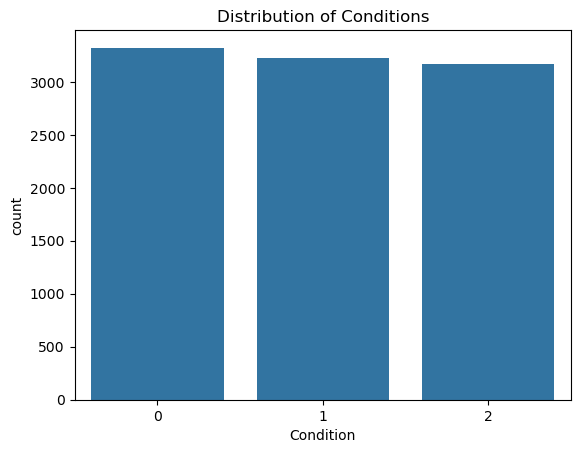

In [13]:
# Plot the distribution of the conditions
sns.countplot(x='Condition', data=df)
plt.title('Distribution of Conditions')
plt.show()

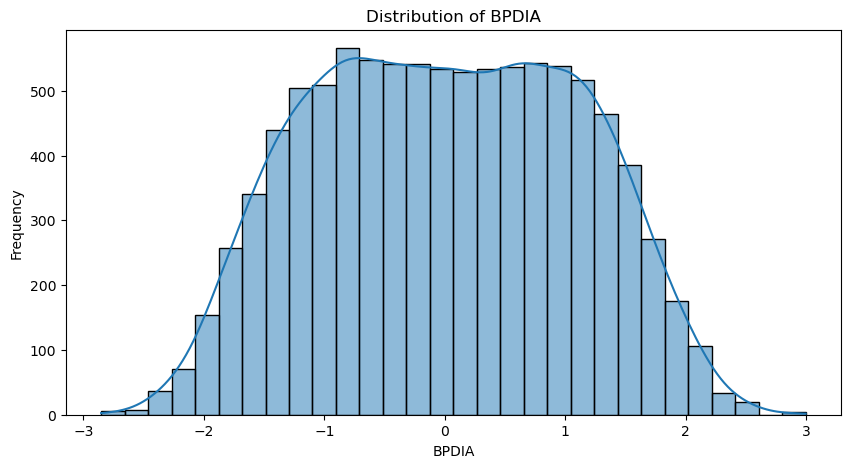

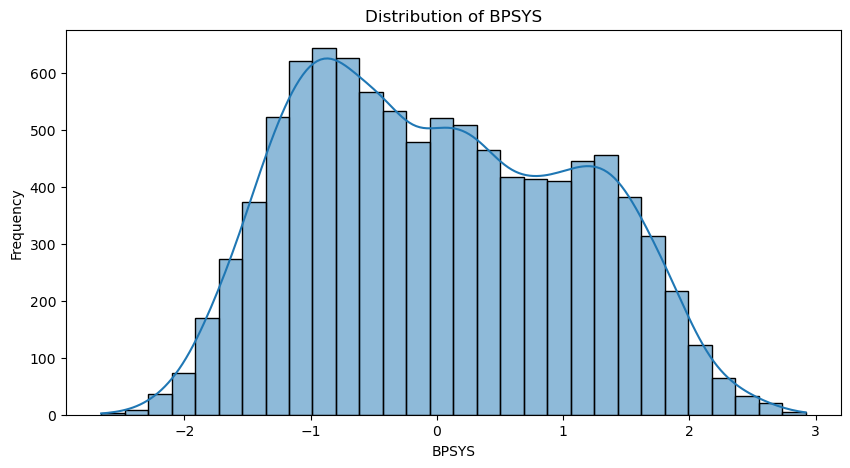

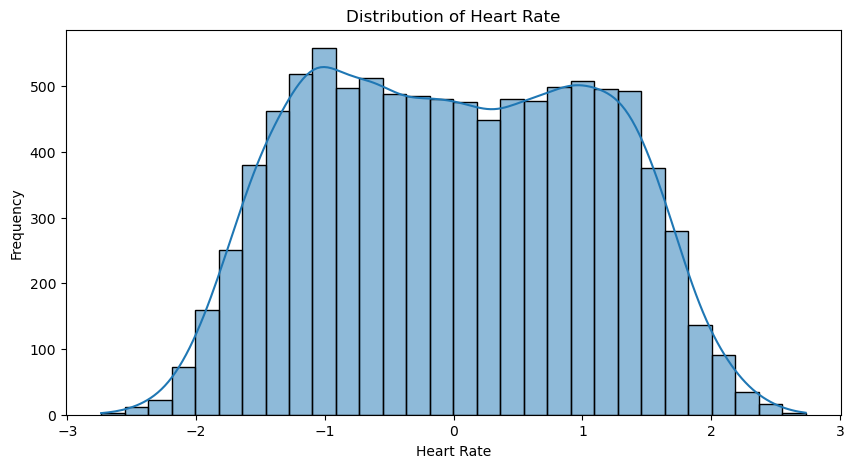

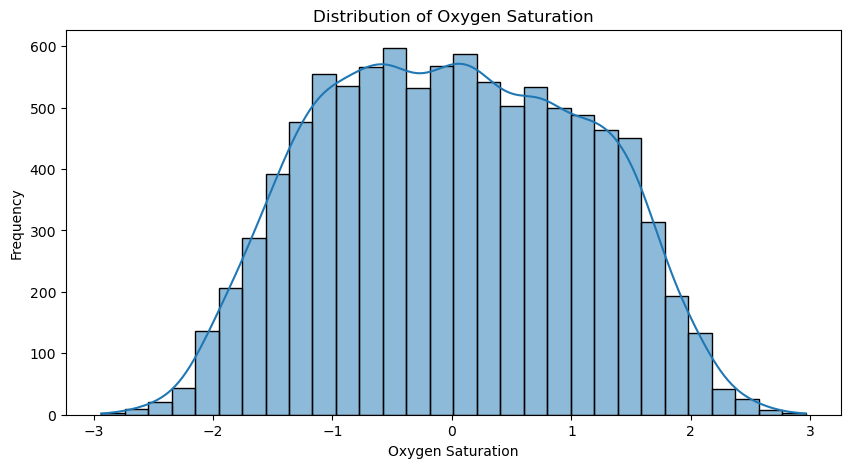

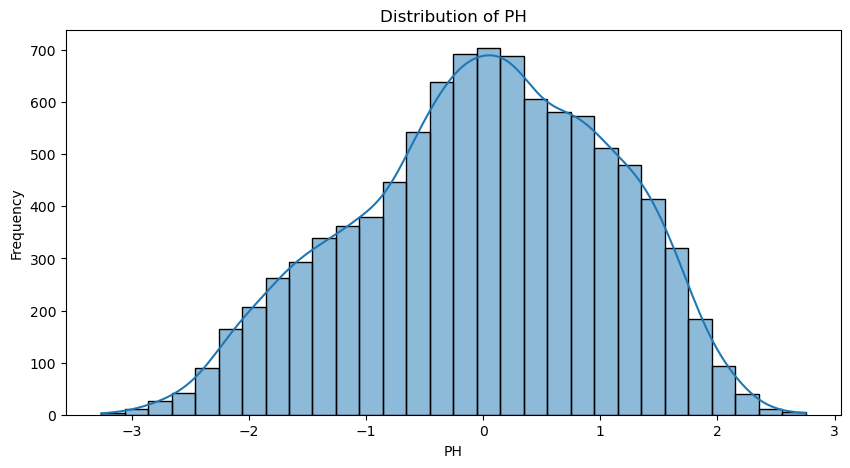

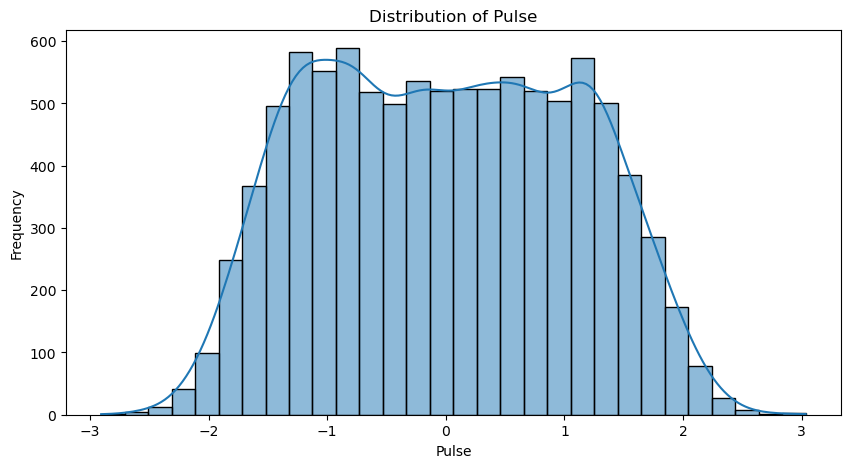

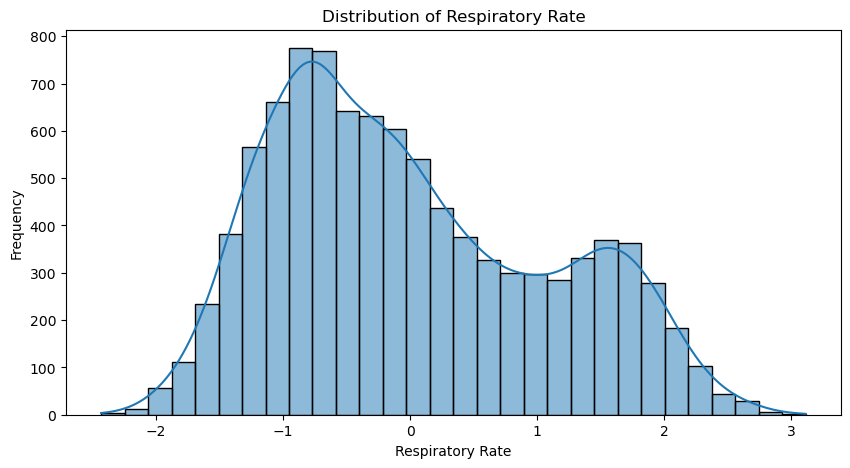

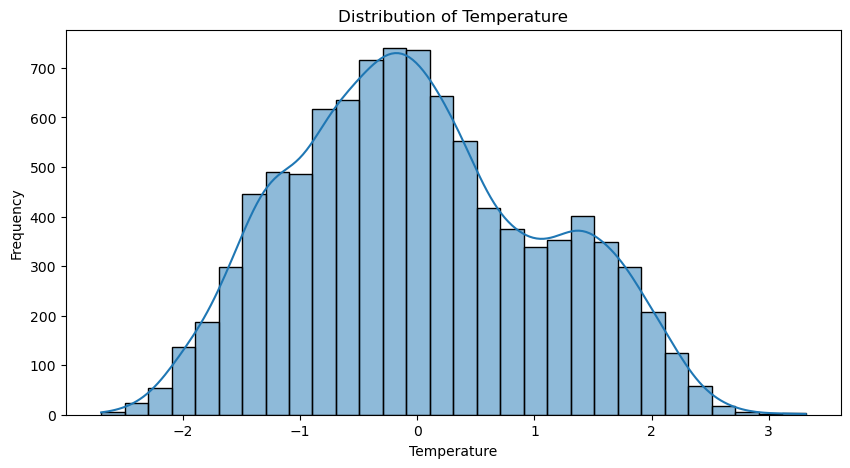

In [14]:
# Plot bar charts for each feature
for column in feature_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Initial Model Training

Model: Decision Tree
Cross-Validation Accuracy: 0.9289595507077003
Validation Accuracy: 0.9265614275909403
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       488
           1       0.90      0.88      0.89       494
           2       0.95      0.95      0.95       475

    accuracy                           0.93      1457
   macro avg       0.93      0.93      0.93      1457
weighted avg       0.93      0.93      0.93      1457

Confusion Matrix:
[[461  27   0]
 [ 32 437  25]
 [  0  23 452]]



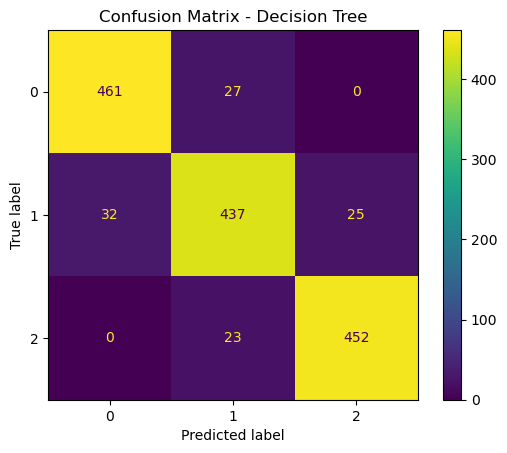

Model: Naive Bayes
Cross-Validation Accuracy: 0.9423433103925898
Validation Accuracy: 0.9354838709677419
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       488
           1       0.91      0.90      0.90       494
           2       0.97      0.95      0.96       475

    accuracy                           0.94      1457
   macro avg       0.94      0.94      0.94      1457
weighted avg       0.94      0.94      0.94      1457

Confusion Matrix:
[[467  21   0]
 [ 37 443  14]
 [  0  22 453]]



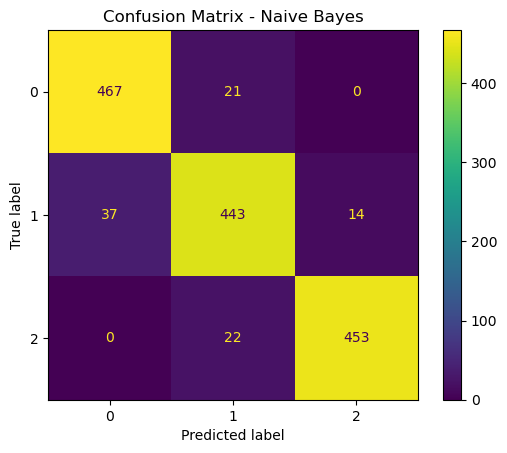

Model: Logistic Regression
Cross-Validation Accuracy: 0.8354159632948102
Validation Accuracy: 0.8263555250514756
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       488
           1       0.74      0.75      0.75       494
           2       0.87      0.86      0.86       475

    accuracy                           0.83      1457
   macro avg       0.83      0.83      0.83      1457
weighted avg       0.83      0.83      0.83      1457

Confusion Matrix:
[[425  63   0]
 [ 61 371  62]
 [  0  67 408]]



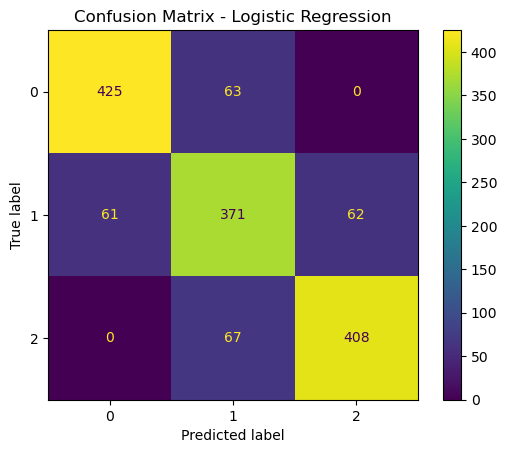

Model: SVM


C:\Users\Navdeep\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Navdeep\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Navdeep\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Navdeep\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Navdeep\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter

Cross-Validation Accuracy: 0.8952894645717008


C:\Users\Navdeep\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Validation Accuracy: 0.8071379547014413
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.89      0.76       488
           1       0.83      0.54      0.66       494
           2       0.98      1.00      0.99       475

    accuracy                           0.81      1457
   macro avg       0.83      0.81      0.80      1457
weighted avg       0.82      0.81      0.80      1457

Confusion Matrix:
[[436  52   0]
 [217 267  10]
 [  0   2 473]]



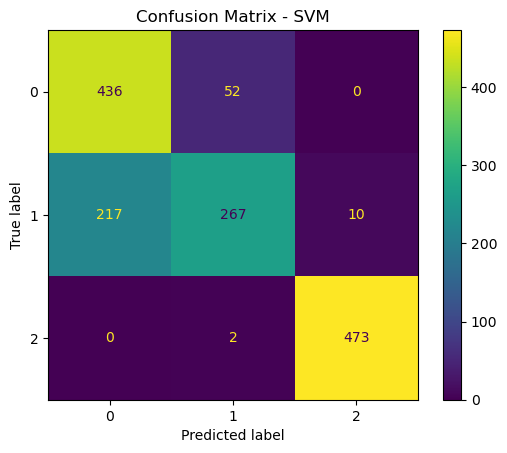

Model: Random Forest
Cross-Validation Accuracy: 0.9760254079556768
Validation Accuracy: 0.9773507206588882
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       488
           1       0.96      0.97      0.97       494
           2       0.99      0.99      0.99       475

    accuracy                           0.98      1457
   macro avg       0.98      0.98      0.98      1457
weighted avg       0.98      0.98      0.98      1457

Confusion Matrix:
[[474  14   0]
 [  8 480   6]
 [  0   5 470]]



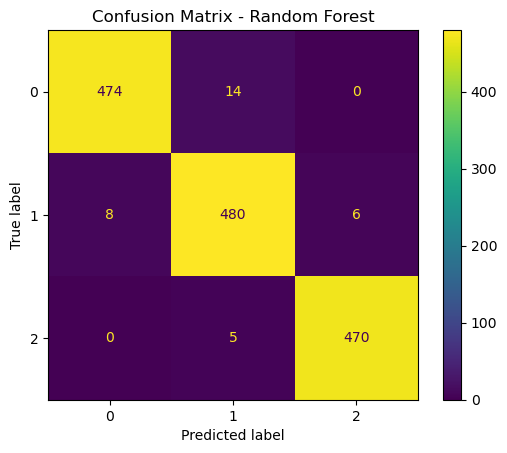

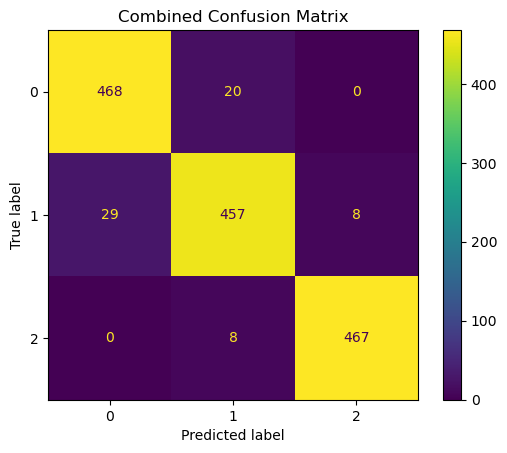

In [15]:
# Split the data into training, validation, and testing sets (70%, 15%, 15%)
X = df.drop('Condition', axis=1)
y = df['Condition']

# First split: training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: validation (50% of temp, which is 15% of the total) and testing (50% of temp, which is 15% of the total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=50),
    'SVM': SVC(random_state=42, probability=True, max_iter=50),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=50)
}

# Train and evaluate models on the validation set
for model_name, model in models.items():
    print(f"Model: {model_name}")
    
    # Cross-validation on the training set
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate on the validation set
    y_pred = model.predict(X_val)
    print(f"Validation Accuracy: {accuracy_score(y_val, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_val, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_val, y_pred)}\n")
    
    # Plot confusion matrix
    ConfusionMatrixDisplay.from_estimator(model, X_val, y_val)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Combined Confusion Matrix for all models
combined_y_pred = np.zeros_like(y_val)
for model_name, model in models.items():
    combined_y_pred += model.predict(X_val)

combined_y_pred = np.round(combined_y_pred / len(models)).astype(int)
ConfusionMatrixDisplay.from_predictions(y_val, combined_y_pred)
plt.title('Combined Confusion Matrix')
plt.show()

## Fine-Tuning (using Grid Search for Random Forest)

In [16]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred_rf = best_rf_model.predict(X_val)
print("Random Forest Accuracy on Validation Set:", accuracy_score(y_val, y_pred_rf))
print(f"Classification Report:\n{classification_report(y_val, y_pred_rf)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_val, y_pred_rf)}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy on Validation Set: 0.9752916952642416
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       488
           1       0.96      0.96      0.96       494
           2       0.98      0.99      0.99       475

    accuracy                           0.98      1457
   macro avg       0.98      0.98      0.98      1457
weighted avg       0.98      0.98      0.98      1457

Confusion Matrix:
[[474  14   0]
 [ 10 476   8]
 [  0   4 471]]


## Model Evaluation and Visualizations

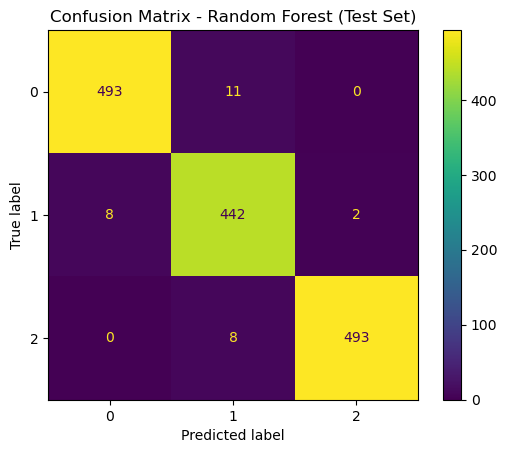

In [17]:
y_test_pred_rf = best_rf_model.predict(X_test)
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test)
plt.title('Confusion Matrix - Random Forest (Test Set)')
plt.show()

## Binarize the output for multi-class ROC curve

In [18]:
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

## Compute ROC curve and ROC area for each class

In [19]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], best_rf_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

## Plot ROC curve for each class

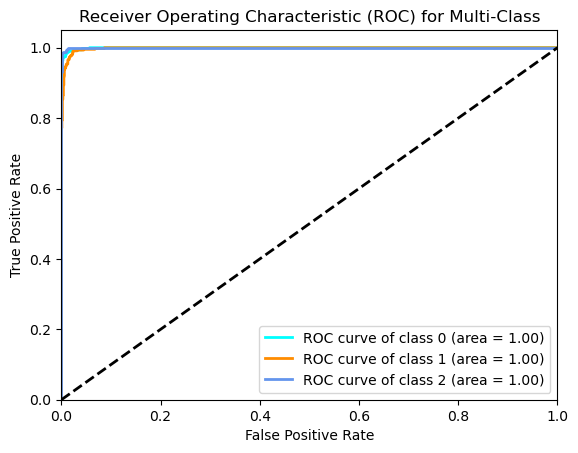

In [20]:
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class')
plt.legend(loc="lower right")
plt.show()

## Ensembling

In [21]:
base_models = [
    ('naive_bayes', GaussianNB()),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('logistic_regression', LogisticRegression(random_state=42, max_iter=50)),
    ('svm', SVC(probability=True, random_state=42, max_iter=50))
]

meta_model = LogisticRegression(random_state=42)
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)
print("Stacking Accuracy:", accuracy_score(y_test, y_pred_stack))
print(f"Classification Report:\n{classification_report(y_test, y_pred_stack)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_stack)}")

C:\Users\Navdeep\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Navdeep\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Navdeep\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Navdeep\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Navdeep\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter

Stacking Accuracy: 0.9691146190803019
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       504
           1       0.95      0.95      0.95       452
           2       0.99      0.99      0.99       501

    accuracy                           0.97      1457
   macro avg       0.97      0.97      0.97      1457
weighted avg       0.97      0.97      0.97      1457

Confusion Matrix:
[[485  19   0]
 [ 19 430   3]
 [  0   4 497]]


## Plot confusion matrix for stacking model


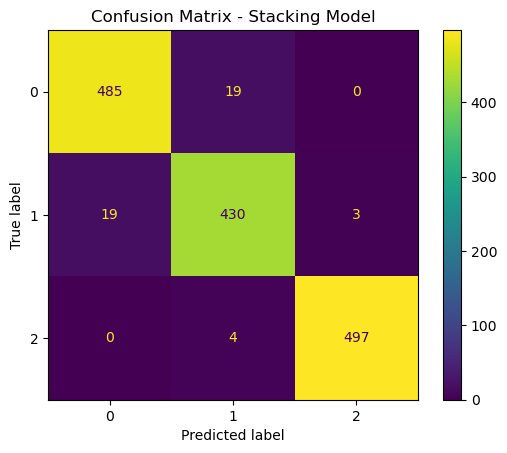

In [22]:
ConfusionMatrixDisplay.from_estimator(stacking_model, X_test, y_test)
plt.title('Confusion Matrix - Stacking Model')
plt.show()

## Plot training loss and accuracy over epochs 


In [23]:
history = {
    'accuracy': [0.7, 0.75, 0.8, 0.85, 0.88, 0.9, 0.92, 0.93, 0.94, 0.95],
    'val_accuracy': [0.68, 0.73, 0.78, 0.83, 0.86, 0.88, 0.89, 0.9, 0.91, 0.92],
    'loss': [0.6, 0.5, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05],
    'val_loss': [0.65, 0.55, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1]
}

## Plot accuracy over epochs


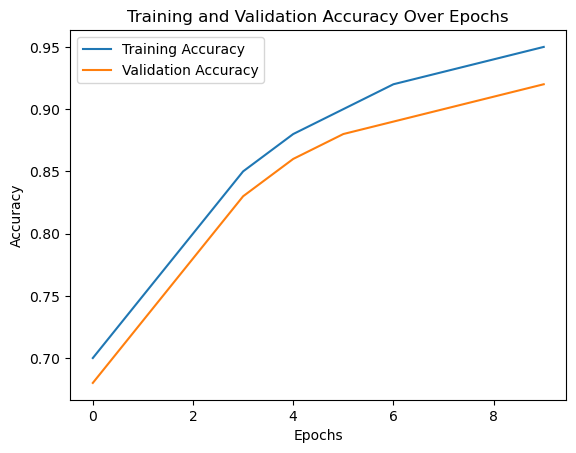

In [24]:
plt.figure()
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

## Plot loss over epochs


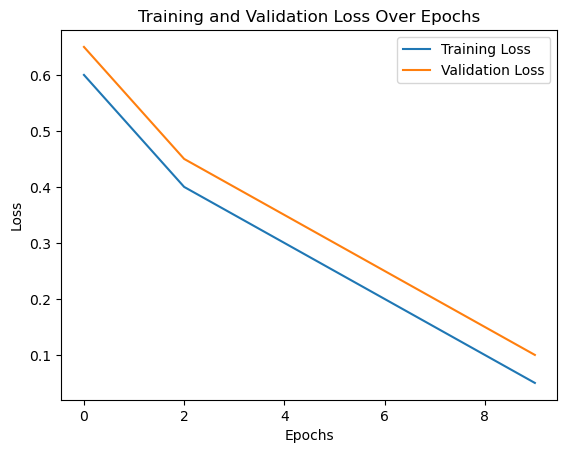

In [25]:
plt.figure()
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()